In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv?raw=true', names=['pregnant','glucose','bloodPressure','diabetes','thickness','insulin','BMI','age','target'])
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pregnant       768 non-null    int64  
 1   glucose        768 non-null    int64  
 2   bloodPressure  768 non-null    int64  
 3   diabetes       768 non-null    int64  
 4   thickness      768 non-null    int64  
 5   insulin        768 non-null    float64
 6   BMI            768 non-null    float64
 7   age            768 non-null    int64  
 8   target         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isna().sum()

pregnant         0
glucose          0
bloodPressure    0
diabetes         0
thickness        0
insulin          0
BMI              0
age              0
target           0
dtype: int64

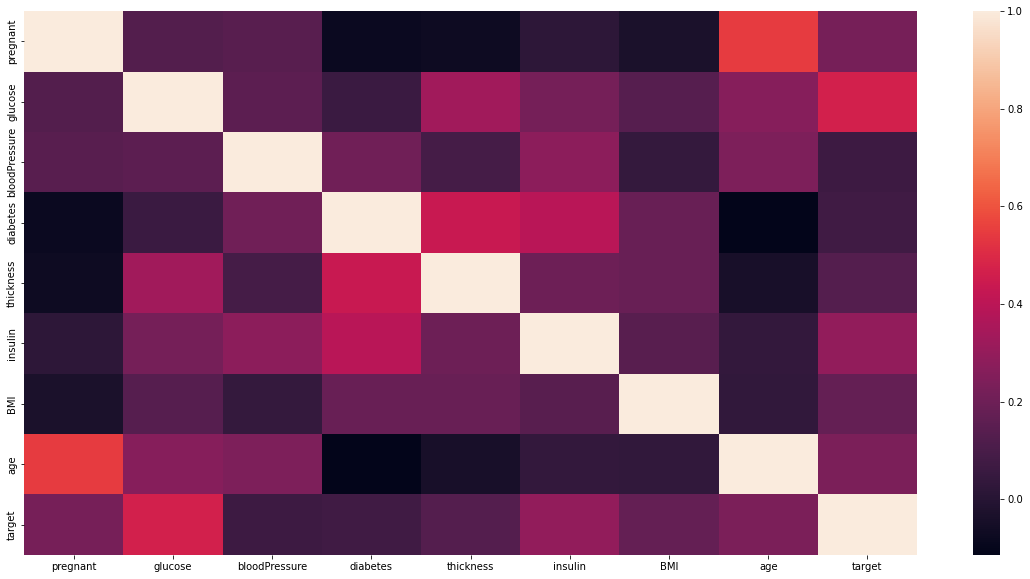

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
pass;

In [7]:
df["target"].value_counts()

0    500
1    268
Name: target, dtype: int64

In [8]:
values = df.values
 
X = values[:,0:8]
Y = values[:,-1]
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

le = LabelEncoder()
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [11]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results = model_selection.cross_val_score(model, X, Y, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

LogReg| Mean=0.779956 STD=0.050088
SVM| Mean=0.765584 STD=0.058884
DecTree| Mean=0.691302 STD=0.062851
KNN| Mean=0.742139 STD=0.071500
LinDisc| Mean=0.773462 STD=0.051592
GaussianNB| Mean=0.755178 STD=0.042766
RanForest| Mean=0.765567 STD=0.062252


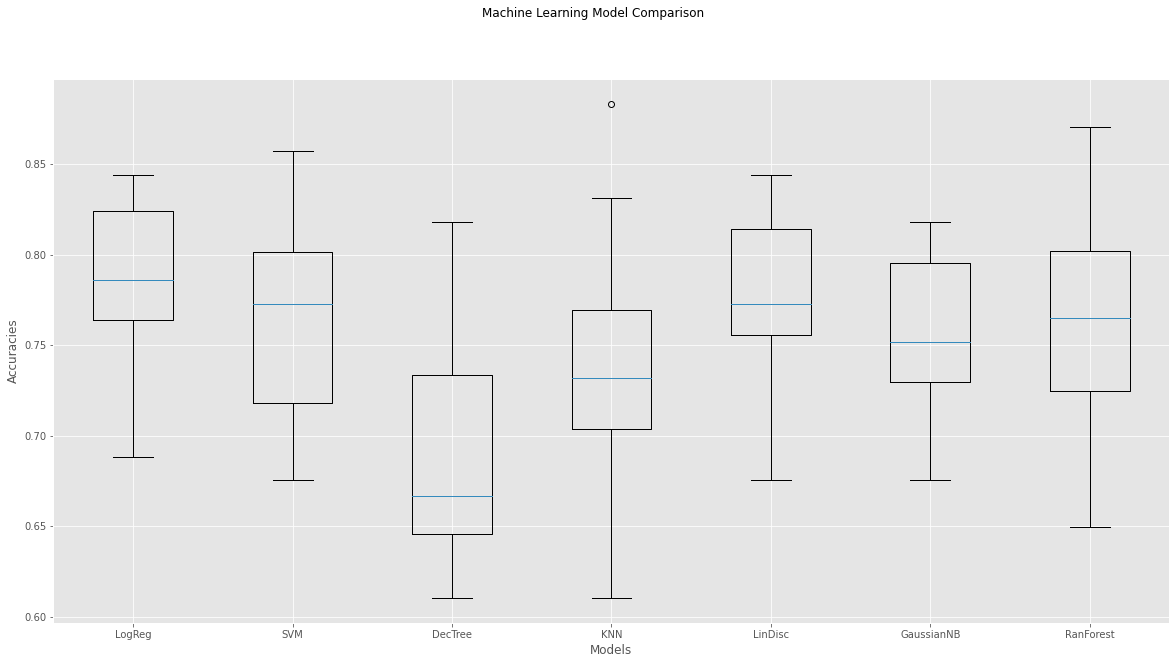

In [12]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
plt.xlabel('Models')
plt.ylabel('Accuracies')
ax.set_xticklabels(model_names)
plt.show()

In [13]:
!pip install -q tensorflow

In [17]:
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.drop(['target'], axis=1, inplace=True)
df

,pregnant,glucose,bloodPressure,diabetes,thickness,insulin,BMI,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [19]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

In [20]:
X

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])
principalDf

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819
...,...,...
763,1.562085,1.923150
764,-0.100405,-0.614181
765,-0.283475,0.097065
766,-1.060324,0.837062


In [23]:
from sklearn.cluster import KMeans

# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    return sse

In [32]:
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user opencv-python
!pip install -q --trusted-host=pypi.org --trusted-host=files.pythonhosted.org --user helper
!pip install -q kneed

In [33]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [45]:
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    sse.append(kmeans.inertia_)

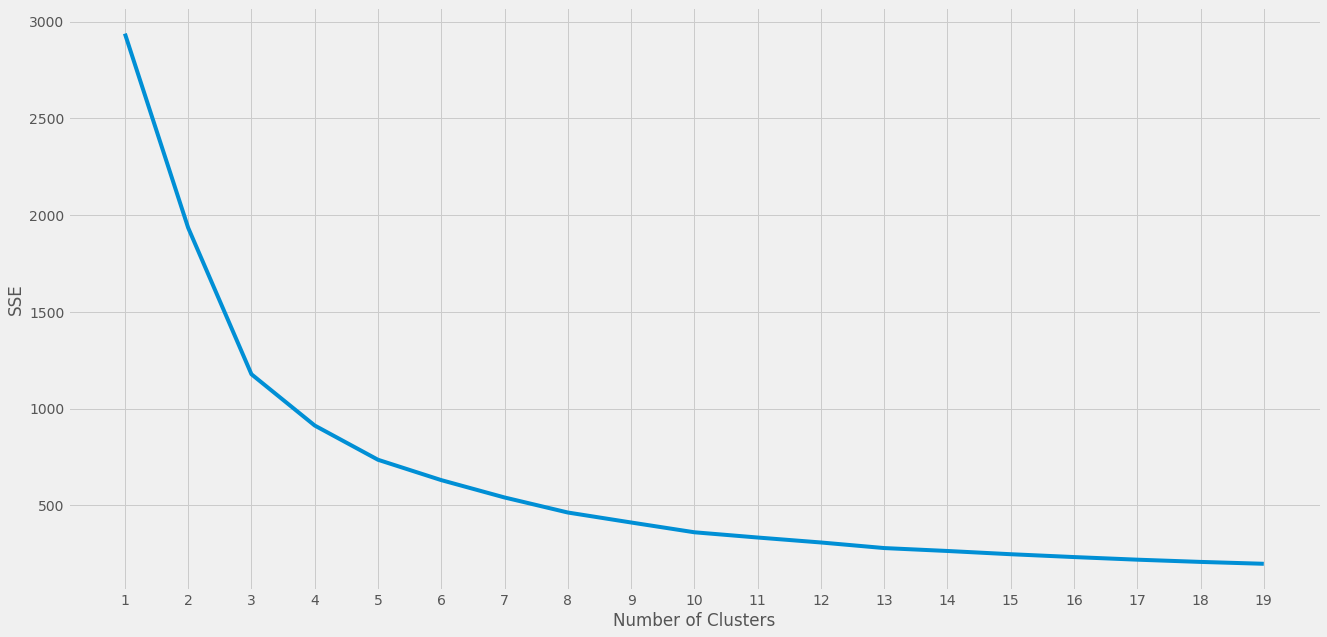

In [46]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [47]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
print("Optimal k-value is:",kl.elbow)

Optimal k-value is: 5


In [48]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(principalDf)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

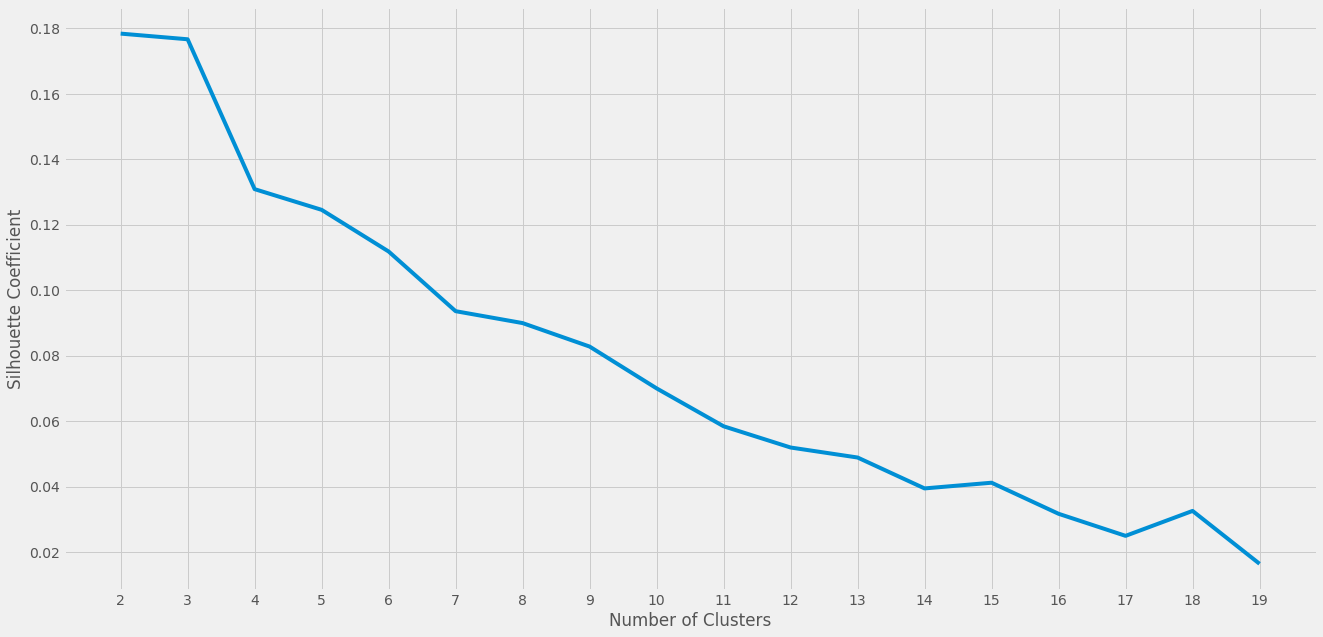

In [49]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [51]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

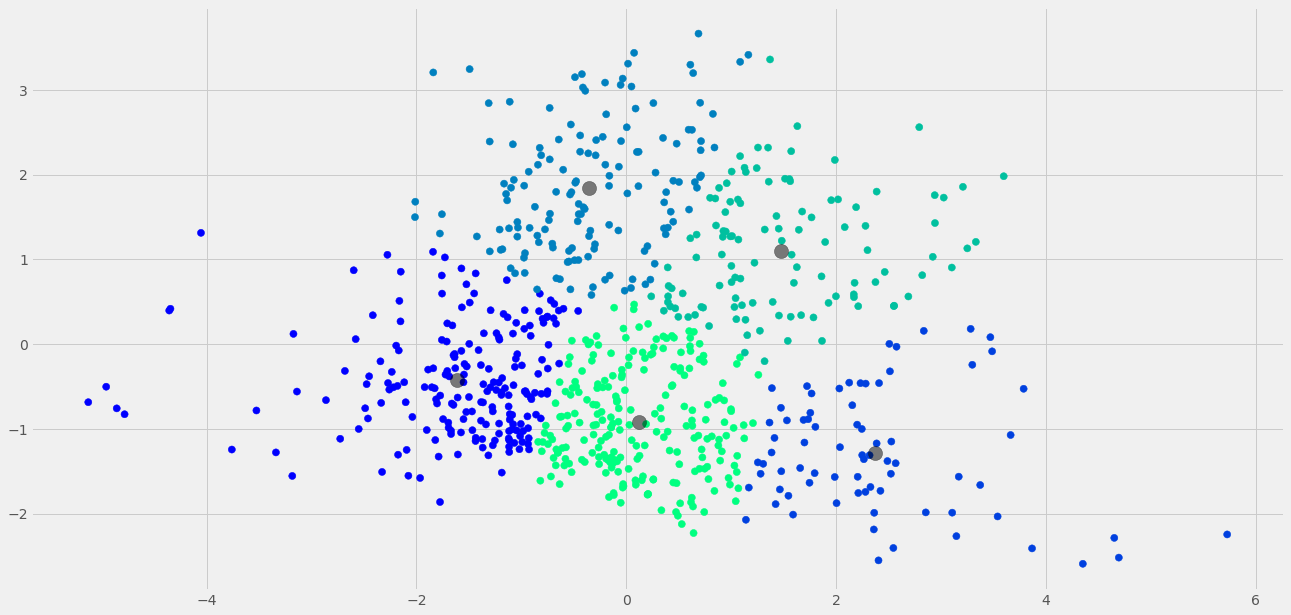

In [55]:
plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_kmeans, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
pass;

In [56]:
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

score_kemans_s = silhouette_score(principalDf, kmeans.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(principalDf, kmeans.labels_)
score_kemans_d = davies_bouldin_score(principalDf, kmeans.fit_predict(principalDf))
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.3592
Calinski Harabasz Score: 570.3921
Davies Bouldin Score: 0.8877


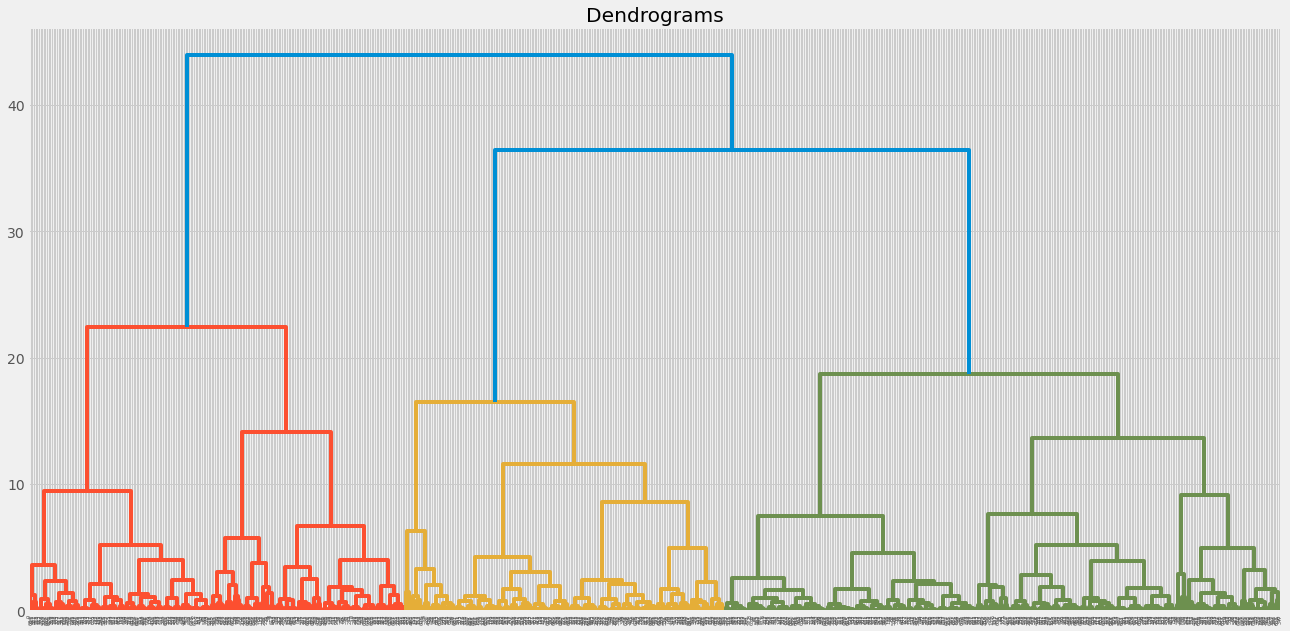

In [57]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(20, 10))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(principalDf, method='ward'))

0.5300704492516455


<Figure size 360x360 with 0 Axes>

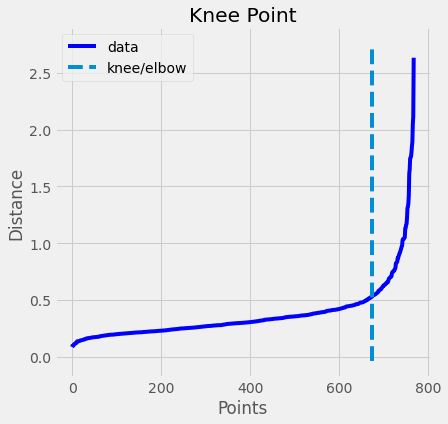

In [60]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(principalDf)
distances, indices = neighbors.kneighbors(principalDf)
distances = np.sort(distances[:,10], axis=0)

from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
pass;
print(distances[knee.knee])
pass;

Optimal number of min_samples based on silhouette score: [5]


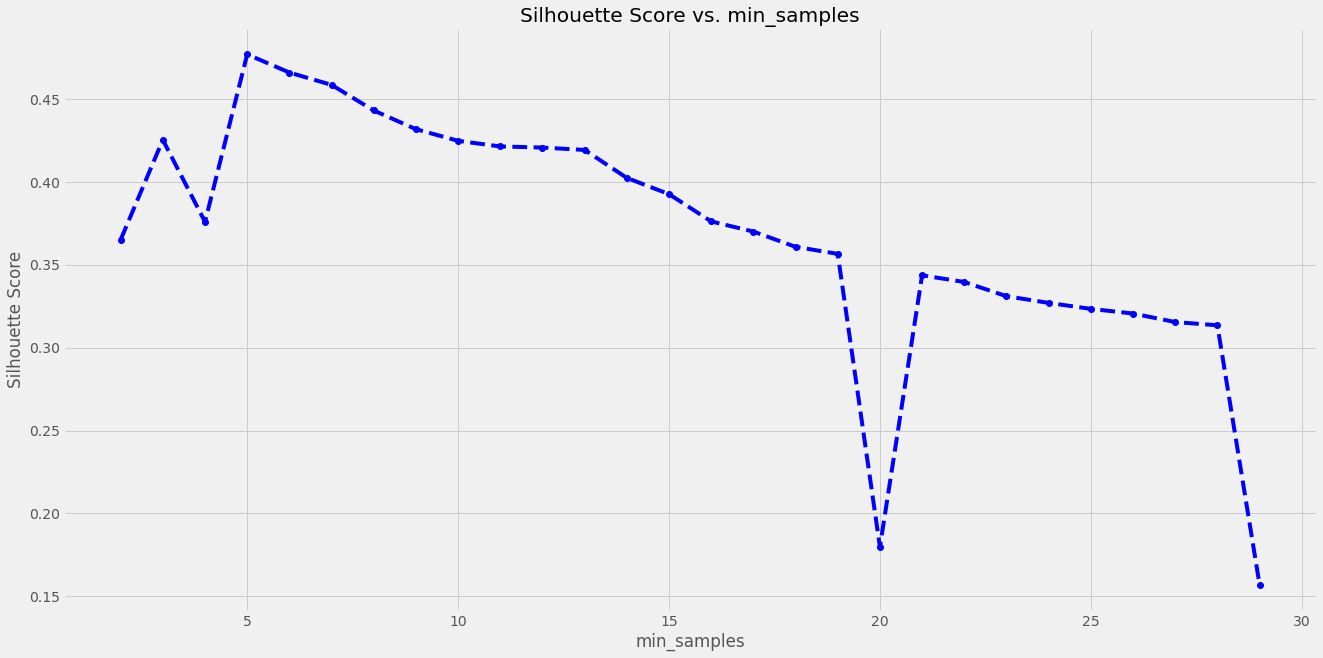

In [61]:
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps=distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = silhouette_score(principalDf, model.labels_, metric='euclidean')
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. min_samples');

df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_samples based on silhouette score:', df4['min_samples'].tolist())

Optimal number of min_sample based on Calinski Harabasz score: [29]


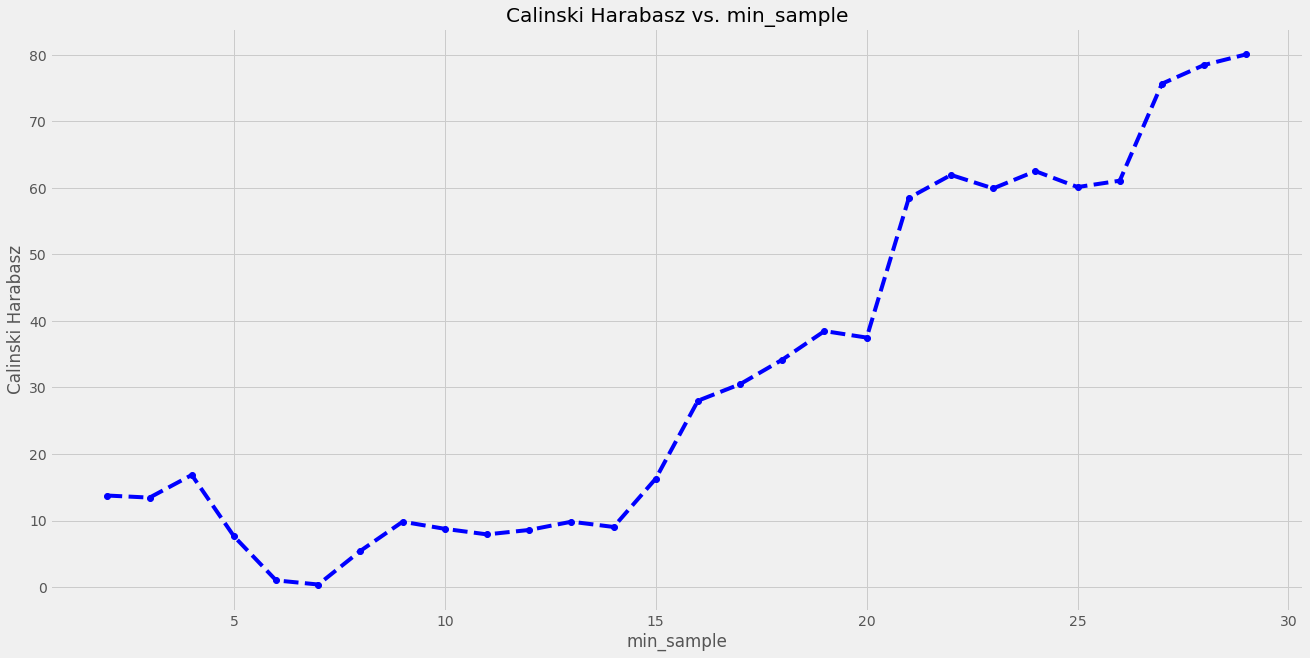

In [62]:
from sklearn.metrics import calinski_harabasz_score  

def get_dbscan_score(data, center):
    
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit(principalDf)
    
    # Calculate Silhoutte Score

    score = calinski_harabasz_score(principalDf, dbscan.labels_)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_sample');
plt.ylabel('Calinski Harabasz');
plt.title('Calinski Harabasz vs. min_sample');

df3 = pd.DataFrame(centers,columns=['min_sample'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.max()]
print('Optimal number of min_sample based on Calinski Harabasz score:', df4['min_sample'].tolist())

Optimal number of min_samples based on DB score: [2]


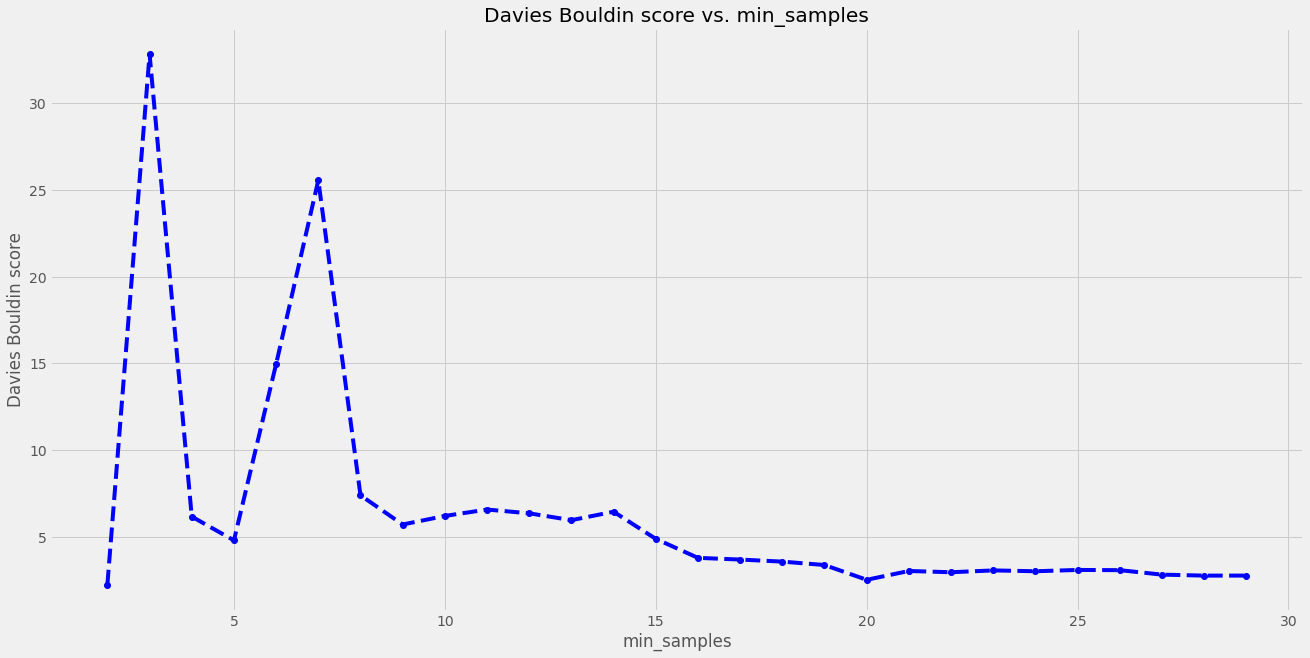

In [64]:
from sklearn.metrics import davies_bouldin_score 

def get_dbscan_score(data, center):
    dbscan = DBSCAN(eps= distances[knee.knee], min_samples=center)

    # Then fit the model to your data using the fit method
    model = dbscan.fit_predict(principalDf)
    
    # Calculate Silhoutte Score

    score = davies_bouldin_score(principalDf, model)
    
    return score

scores = []
centers = list(range(2,30))

for center in centers:
    scores.append(get_dbscan_score(principalDf, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('min_samples');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. min_samples');


df3 = pd.DataFrame(centers,columns=['min_samples'])
df3['scores'] = scores
df4 = df3[df3.scores == df3.scores.min()]
print('Optimal number of min_samples based on DB score:', df4['min_samples'].tolist())

In [68]:
from numpy import unique
from numpy import where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
# define the model
model = DBSCAN(eps=distances[knee.knee], min_samples= 4)
# rule of thumb for min_samples: 2*len(cluster_df.columns)
# fit model and predict clusters
yhat = model.fit_predict(principalDf)
# retrieve unique clusters
clusters = unique(yhat)
# Calculate cluster validation metrics
score_dbsacn_s = silhouette_score(principalDf, yhat, metric='euclidean')
score_dbsacn_c = calinski_harabasz_score(principalDf, yhat)
score_dbsacn_d = davies_bouldin_score(principalDf, yhat)
print('Silhouette Score: %.4f' % score_dbsacn_s)
print('Calinski Harabasz Score: %.4f' % score_dbsacn_c)
print('Davies Bouldin Score: %.4f' % score_dbsacn_d)

Silhouette Score: 0.3758
Calinski Harabasz Score: 16.8524
Davies Bouldin Score: 6.1618


In [70]:
yhat

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [91]:
def dbscan():
    db = DBSCAN(eps=distances[knee.knee], min_samples=15)
    db.fit(principalDf)
    y_pred = db.fit_predict(principalDf)
    plt.scatter(principalDf['PC1'], principalDf['PC2'], c=y_pred, cmap='winter')
    plt.title("DBSCAN")
    pass;

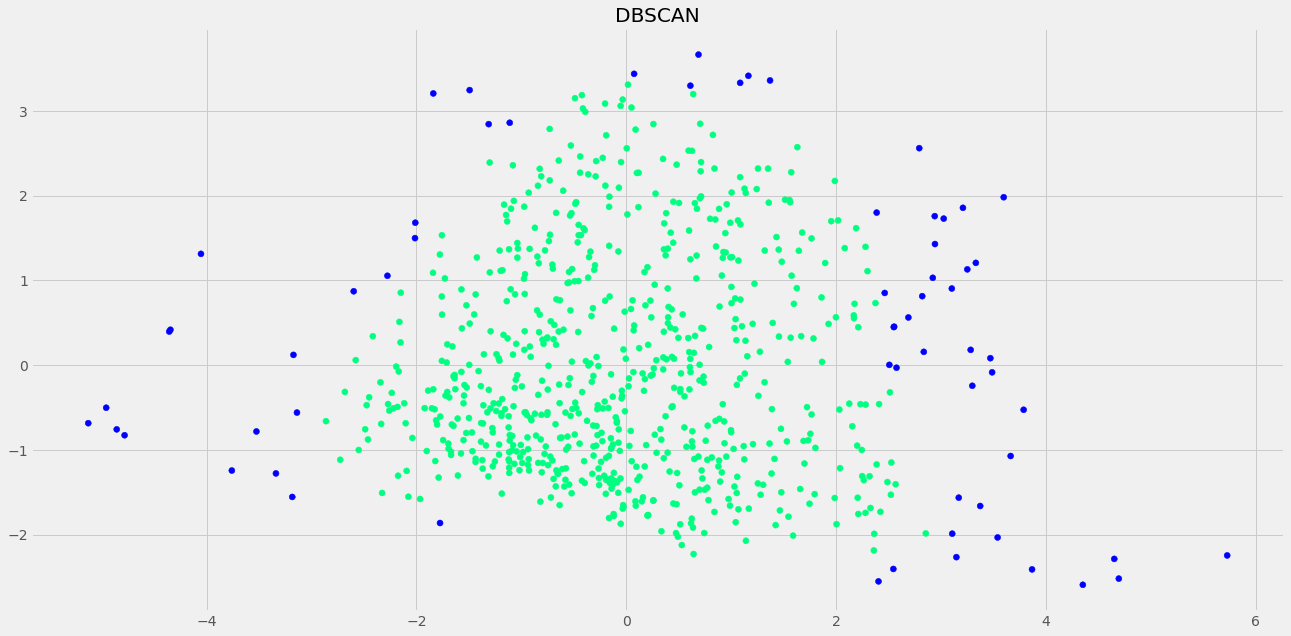

In [92]:
dbscan()